# Lesson 09
# Peter Lorenz
In this assignment, we build a TensorFlow model to classify images.

## 0. Preparation
Import libraries:

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow import keras

Set global options:

In [3]:
# Display plots inline
%matplotlib inline

# Display multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Suppress scientific notation
np.set_printoptions(suppress=True)
np.set_printoptions(precision=3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Declare functions:

Constants:

In [25]:
LABELS = ['airplane', 'automobile', 'bird', 'cat', 
          'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## 1. Read CIFAR-10 dataset from Keras
In this section we read the image data for the images our model will classify.

In [6]:
# Load data set
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Display data set dimensions
print('Training data shape:', x_train.shape)
print(x_train.shape[0], ' training samples')
print(x_test.shape[0], ' test samples')

170500096/170498071 [==============================] - 484s 3us/step
Training data shape: (50000, 32, 32, 3)
50000  training samples
10000  test samples


The data set is partitioned into 50K training and 10K test samples.

## 2. Explore data
In this section we explore the image data to get a sense of its structure. We begin by examining a small section of the first training sample:

In [47]:
# First image
x_train[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

The image data in the training data set is somewhat unintuitive given that it is simply color information to render images. The labels consist of the image classes labeled from 0 through 9, presented here with string labels:

In [38]:
# First ten labels
[(x, LABELS[x]) for x in y_train[:10].flatten()]

[(6, 'frog'),
 (9, 'truck'),
 (9, 'truck'),
 (4, 'deer'),
 (1, 'automobile'),
 (1, 'automobile'),
 (2, 'bird'),
 (7, 'horse'),
 (8, 'ship'),
 (3, 'cat')]

The data consists of an array of arrays of arrays containing the image data. We display ten random images from the data set with their labels:

Text(0.5, 1.0, 'airplane')

Text(0.5, 1.0, 'automobile')

Text(0.5, 1.0, 'bird')

Text(0.5, 1.0, 'cat')

Text(0.5, 1.0, 'deer')

Text(0.5, 1.0, 'dog')

Text(0.5, 1.0, 'frog')

Text(0.5, 1.0, 'horse')

Text(0.5, 1.0, 'ship')

Text(0.5, 1.0, 'truck')

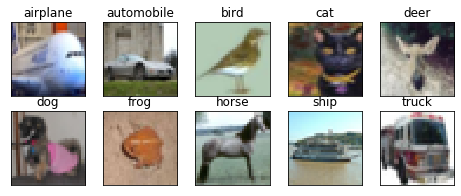

In [53]:
# Display 10 random images and labels
fig = plt.figure(figsize=(8,3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num,::]
    ax.set_title(LABELS[i])
    plt.imshow(im)
plt.show()

To inspect the range of color values, we render a single image with a color bar:

<Figure size 432x288 with 0 Axes>

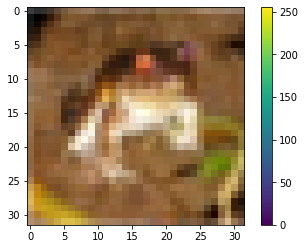

In [54]:
# Display with color bar
plt.figure()
plt.imshow(x_train[0, :, :])
plt.colorbar()
plt.grid(False)
plt.show()

Since neural networks perform better with normalized data, we will normalize the color values of our data set during preprocessing to values between 0 and 1.

## 3. Preprocess and prepare data
In this section we preprocess and prepare the data for classification, beginning with normalizing the image data to values between 0 and 1:

In [55]:
x_train, x_test = x_train / 255.0, x_test / 255.0

Verify that the image data has been properly normalized:

<Figure size 432x288 with 0 Axes>

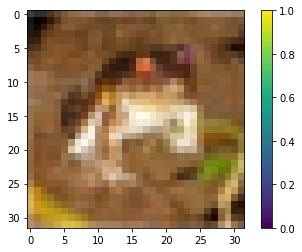

In [56]:
# Display with color bar
plt.figure()
plt.imshow(x_train[0, :, :])
plt.colorbar()
plt.grid(False)
plt.show()

The image data has been normalized. We can now proceed to modeling.

## 4. Build a TensorFlow model
In this section we build a TensorFlow model using a single dense hidden layer. We are constrained to 64 nodes in the middle layer due to resource exhaustion errors:

In [66]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32, 32, 3)),
    keras.layers.Dense(64, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

Compile the model:

In [67]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

Fit the model:

In [68]:
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
50000/50000 [==============================] - 14s 283us/sample - loss: 1.9288 - acc: 0.3020
Epoch 2/5
50000/50000 [==============================] - 9s 170us/sample - loss: 1.8173 - acc: 0.3442
Epoch 3/5
50000/50000 [==============================] - 9s 172us/sample - loss: 1.7627 - acc: 0.3661
Epoch 4/5
50000/50000 [==============================] - 10s 207us/sample - loss: 1.7304 - acc: 0.3781
Epoch 5/5
50000/50000 [==============================] - 10s 205us/sample - loss: 1.7143 - acc: 0.3868


After fitting the model, we apply it to the test data and assess performance.

## 5. Apply model to test data and evaluate accuracy
In this section we apply our model to the test data set and evaluate its accuracy:

In [69]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 126us/sample - loss: 1.7702 - acc: 0.3737
Test accuracy: 0.3737


## 6. Perform 3 adjustments to improve accuracy
In this section we perform 3 adjustments to the number of layers and activation functions to improve accuracy.

## 7. Summarize findings
In this section we summarize our findings regarding the different iterations and any insights gained.